In [1]:
from src.infer_models import infer
from src.preprocess import preprocess
from src.archs_models import *
# from src.opts_models import dectree
import os
import sys
import pathlib
from pathlib import Path

import numpy as np
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "text.latex.preamble": r'\usepackage{amsmath,amsthm,amsfonts,amssymb}',
    })  # Avant Garde, 

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})


# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)

# os.chdir(r'./ai534ias/ia1/')

# Generate the path to the file relative to your python script:
# script_location = Path(__file__).absolute().parent
# print(script_location)
# file_location = script_location / 'file.yaml'
# file = file_location.open()


/home/somefunagba/ias/ia4


In [2]:
# Data Preprocessing

# do major feature engineering - 0 | 1
doengr = 0
donormalize = 1

# Train
rawdata = 'csvs/mushroom-train.csv'
traindata, train_id = preprocess(rawdata, donormalize=donormalize, istrain=1,
                                 traininfo=None, doengr=doengr)

# View final data entering the model.
# print(traindata['X'])

# Dev
rawdata = 'csvs/mushroom-val.csv'
devdata, dev_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                             traininfo=traindata, doengr=doengr)


data size (rows,columns) (4500, 118)
data size (rows,columns) (1600, 118)


In [3]:
DX = traindata['X']
DY = traindata['Y']
x_names = traindata['feats']
rows, cols = DX.shape

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
# training_data = [
#     ['Green', 3, 'Apple'],
#     ['Yellow', 3, 'Apple'],
#     ['Red', 1, 'Grape'],
#     ['Red', 1, 'Grape'],
#     ['Yellow', 3, 'Lemon'],
# ]
# TRAIN
# DX = np.array([[0,0],[1,0],[2,1],[2,1],[1,0]])
# DY = np.array([0,0,1,1,2])
# # TEST
# DXT = np.array([[0,0],[1,2],[2,3],[2,1],[1,0]])
# DYT = np.array([0,0,1,1,2])
# x_names = ["color", "diameter"]


In [4]:
pass
best_splitdec = search_bestsplit(DX, DY, x_names, ent_class)
for k in best_splitdec:
  print(k,":",best_splitdec[k])

name : odor=n
id : 27
val : 0
ig : 0.5351367538654915


In [5]:
dmax = [1,2,3,4,5,6,7,8,9,10]
mdltrees = []
for max_d in dmax:
  print(f"\n*** Max-Depth: {max_d} ***")
  dectree = DecisionTree(metric_class=ent_class, max_depth=max_d, min_size=3)
  dectree.nodes = dectree.build(DX, DY, x_names)
  dectree.print()
  
  print(f"***----------------------------***")
  print('training:')
  ytrain_hat, acc_train, misstrain  = dectree.infer(traindata['X'],traindata['Y'])
  print('validation:')
  ydev_hat, acc_dev, missdev = dectree.infer(devdata['X'],devdata['Y'])
  print(f"***----------------------------***")
  mdltrees.append({"model": dectree,  "dmax": max_d, "facc_train": acc_train, "facc_dev": acc_dev})


*** Max-Depth: 1 ***
[0] > X[odor=n] = 0, (information gain: 0.54):
> --> True: 
>    (class) predict: 0
> --> False: 
>    (class) predict: 1
***----------------------------***
training:
class accuracy: 0.89, misses: 514
validation:
class accuracy: 0.89, misses: 174
***----------------------------***

*** Max-Depth: 2 ***
[0] > X[odor=n] = 0, (information gain: 0.54):
> --> True: 
[1] >  X[bruises?=f] = 0, (information gain: 0.4):
>  --> True: 
>     (class) predict: 1
>  --> False: 
>     (class) predict: 0
> --> False: 
[1] >  X[spore-print-color=r] = 0, (information gain: 0.1):
>  --> True: 
>     (class) predict: 1
>  --> False: 
>     (class) predict: 0
***----------------------------***
training:
class accuracy: 0.93, misses: 315
validation:
class accuracy: 0.92, misses: 133
***----------------------------***

*** Max-Depth: 3 ***
[0] > X[odor=n] = 0, (information gain: 0.54):
> --> True: 
[1] >  X[bruises?=f] = 0, (information gain: 0.4):
>  --> True: 
[2] >   X[stalk-root=c] 

Decision-Tree Varying Max-Depth Plot...	
Done.



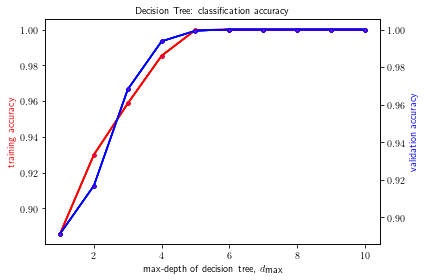

In [6]:

# Plots
print('Decision-Tree Varying Max-Depth Plot...\t')    
fig, ax1 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax2 = ax1.twinx()

x_dmax = []
y_trainacc = []
y_devacc = []
for mdls in mdltrees:
    x_dmax.append(mdls['dmax'])
    y_trainacc.append(mdls['facc_train'])
    y_devacc.append(mdls['facc_dev'])

for mdls in mdltrees:
    ax1.plot(x_dmax,y_trainacc,
                color='r', marker='.', markerfacecolor='m', alpha=0.5)
    ax1.set_ylabel(f'training accuracy', color='r')
    
    ax2.plot(x_dmax,y_devacc,
                color='b', marker='.', markerfacecolor='m', alpha=0.5)
    ax2.set_ylabel(f'validation accuracy', color='b')
    ax1.set_xlabel(f"max-depth of decision tree, $d_{{\\hbox{{max}}}}$")
    ax1.set_title(f"Decision Tree: classification accuracy",
                color='k', weight='bold', size=10)
     
# plt.ion
plt.savefig(figs_dir + f"figtree_pt1.pdf", bbox_inches='tight')
print('Done.\n')


